<a href="https://colab.research.google.com/github/Ty700/CSCE_676/blob/main/335009542.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CSCE 676 :: Data Mining and Analysis :: Texas A&M University :: Spring 2026


# Weekly Homework 1: Data Basics


***Goals of this homework:***
Onboard into the course (introductions and short video), perform end-to-end data analysis on a noisy real-world dataset (ingestion, cleaning, feature engineering, and exploratory data analysis), practice clear technical communication (written and spoken via short video), and answer interview-style questions that assess data reasoning, assumptions, tradeoffs, and limitations.


***Submission instructions:***

You should post your notebook to Canvas (look for the homework 1 assignment there). Please name your submission **your-uin_hw1.ipynb**, so for example, my submission would be something like **555001234_hw1.ipynb**. Your notebook should be fully executed when you submit ... so run all the cells for us so we can see the output, then submit that.

***Grading philosophy:***

We are grading reasoning, judgment, and clarity, not just correctness. Show us that you understand the data, the constraints, and the limits of your conclusions.

***For each question, you need to respond with 3 cells:***
1. **[A Code Cell] Your Code:** If code is not applicable, put `# no code` in the cell. For tests: tests can be simple assertions or checks (e.g., using `assert` or `print` or small functions or visual inspection); formal testing frameworks are not required.
2. **[A Markdown Cell] Your Answer:** Write up your answers and explain them in complete sentences. Include any videos in this section as well; for videos, upload them to your TAMU Google Drive, and ensure they are set to be visible by the instruction team (`caverlee@tamu.edu` and `mariateleki@tamu.edu`), then share the link to the video in the cell.
3. **[A Markdown Cell] Your Resources:** You need to cite 3 types of resources and note how they helped you: (1) Collaborators, (2) Web Sources (e.g. StackOverflow), and (3) AI Tools (you must also describe how you prompted, but we do not require any links to any specific chats). Specifically, use the following format as a template:
```
On my honor, I declare the following resources:
1. Collaborators:
- Reveille A.: Helped me understand that a df in pandas is a data structure kinda like a CSV.
- Sully A.: Helped me fix a bug with the vector addition of 2 columns.
- ...

2. Web Sources:
- https://stackoverflow.com/questions/46562479/python-pandas-data-frame-creation: how to create a pd df
- ...

3. AI Tools:
- ChatGPT: I gave it the homework .ipynb file and the ufo.csv, and told it to generate the code for the first question, but it did it with csv.reader(), so I re-prompted it to use pandas and that one was correct
- ...
```
***Why do we require this cell?*** This cell is important...

1. For academic integrity, you must give credit where credit is due.

2. We want you to pay attention to how you can successfully get help to move through problems! Is there someone you work with or an AI tool that helps you learn the material better? That's great! The point of engineering is to use your tools to solve hard problems, and part of graduate school is learning about how *you* learn and solve problems best.

***A reminder: you get out of it what you put into it.***
Do your best on these homeworks, show us your creativity, and ask for help when you need it -- good luck!

# A [4pts]. Hi! Introduce Yourself

**Note:** We only need 1 markdown cell for these questions.

**Rubric**

[2pt] Complete, thoughtful response.

[1pt] Partial response.

[0pt] Minimal response.


## 1.
Welcome to CSCE 676! Head to this thread -- **"Week 1: Introductions (on Canvas Discussions)"** -- in this week's module and introduce yourself. When you're done, type "done" here.
**Done.**

## 2.

I want to get to know you all! Please share a very brief (1min max) video saying hello.

What to include:

* A greeting (hello, hola, yo!, whatever)
* Please tell me how you pronounce your name
* One memorable thing -- could be your favorite meme, an interesting fact, favorite movie, etc. Just something that will help me remember -- like "Aha, Alice is that student who really loves skateboarding".

See the introduction for instructions on how to share the video.



# B [64pts]. UFO Sightings — Data Ingestion, Cleaning, and Feature Engineering

**Dataset:** `ufos.csv`

Detected columns: `datetime`, `city`, `state`, `country`, `shape`, `duration (seconds)`, `duration (hours/min)`, `comments`, `date posted`, `latitude`, `longitude`, and possibly extra unnamed columns.

**Goal:** Perform a set of tasks to load the data, diagnose issues, clean/standardize it, and derive basic features to support downstream mining using the Python package `pandas`.

**Rubric**

[8 pts] Strong/Professional: Correct and complete implementation of the task; Reasonable assumptions, stated or implied, and justified; Thoughtful handling of real-world data issues (missingness, noise, scale, duplicates, edge cases); Clear, concise explanations of what was done and why; Code is clean, readable, and well-structured, uses appropriate pandas, and would plausibly pass a professional code review; Tests meaningfully validate non-trivial behavior (not just "the code runs so it must be right").

[4 pts] Partial/Developing: Core task mostly completed but with gaps, weak assumptions, or minor mistakes; Reasoning is shallow or mostly descriptive; Code works but is messy, repetitive, or fragile; Tests are superficial, incomplete, or poorly motivated.

[0 pts] Minimal/Incorrect: Task is largely incorrect, missing, or misunderstands the goal; Little to no reasoning or justification; Code does not run or ignores constraints; No meaningful tests.


## 1.

* Load `ufos.csv` into a pd.DataFrame named `ufo_raw`.
* Display 5 random rows and `ufo_raw.info()`.
* Display the number of rows/columns.
* Display any empty columns.
* Write at least 1 test for your code, then answer: What did you test for? How do you know your code is correct?


In [1]:
import pandas as pd

bad_lines = []
ufo_raw = pd.read_csv('ufos.csv', engine='python', on_bad_lines=lambda line: bad_lines.append(line))

# Tests to make sure ufos.csv was loaded correctly
assert(ufo_raw.shape[0] > 0)
assert(ufo_raw.shape[1] > 0)

# Test to make sure ufo_raw is of DataFrame type
assert(type(ufo_raw) == pd.core.frame.DataFrame)

# Displays a random 5 rows
print("======================== RANDOM 5 ROWS ========================")
print(ufo_raw.sample(5), end='\n\n')

# Displays information about ufo_raw CSV
print("======================== UFO_RAW.INFO() ========================")
print(ufo_raw.info(), end='\n\n')

print("======================== UFO_RAW ROWS & COLUMNS ========================")
print(f"UFO ROWS: {ufo_raw.shape[0]}")
print(f"UFO COLUMNS: {ufo_raw.shape[1]}", end='\n\n')

print("======================== UFO_RAW EMPTY COLUMNS ========================")
# Finds all empty columns
empty_columns = [col for col in ufo_raw.columns if ufo_raw[col].isna().all()]
if empty_columns:
    print('\n'.join(empty_columns))
    print('\n\n')
else:
    print("No empty columns\n")

print("======================== UFO_RAW BAD LINES ========================")
# Prints all bad lines
if bad_lines:
    print(f"Bad lines: {len(bad_lines)}")
else:
    print("No bad lines")


======================== RANDOM 5 ROWS ========================
               datetime                city state country     shape  \
70902    7/9/2012 01:30           elizabeth    nj      us     other   
54960   6/16/2008 24:00          great bend    ks      us  triangle   
37900   3/30/2008 06:01  sydney (australia)   NaN      au       egg   
65829   7/24/1995 03:00             olympia    wa      us       NaN   
3899   10/21/2011 22:00            maricopa    az      us  triangle   

      duration (seconds) duration (hours/min)  \
70902                 60             1 minute   
54960                  6            6 seconds   
37900                300            5 minutes   
65829                 22              22 sec.   
3899                   5            5 seconds   

                                                comments date posted  \
70902  Hovering air craft not making a noise over jer...    8/5/2012   
54960  Three bright lights hovering over Great Bend K...    7/5/2008  

## Q/A

### 1. What did you test for? How do you know your code is correct?

I tested to make sure the ufos.csv data was read correctly by asserting the rows and columns were greather than 0.

I also tested to make sure ufo_raw's data type was pd.DataFrame.

```
On my honor, I declare the following resources:
1. Collaborators:
N/A

2. Web Sources:
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame: Used for understanding DataFrame APIs (read_csv, on_bad_lines, isna, etc)

3. AI Tools:
- Sonnet 4.5: I gave it the ufo.csv and prompted it to characterize the set. (How many columns are empty, bad lines, total rows/columns)
```


## 2.

Create a cleaned DataFrame `ufo`:

* Drop fully-empty or irrelevant columns (e.g., unnamed columns).
* Parse `datetime` to `datetime64[ns]` (`errors='coerce'`).
* Coerce `duration (seconds)`, `latitude`, `longitude` to numeric.
* Lowercase/trim `city`, `state`, `country`, `shape`.
* Remove rows with impossible coordinates (lat ∉ [-90,90], lon ∉ [-180,180]).
* Drop exact duplicates based on a reasonable subset (document your choice).
* Write at least 2 tests for your code (focus on the most complicated parts), then answer: What did you test for? How do you know your code is correct?


In [2]:
# Drop fully-empty or irrelevant columns
ufo = ufo_raw.drop(columns=empty_columns, axis=1)

# Parse datetime to datetime64[ns] (errors='coerce').
ufo['datetime'] = pd.to_datetime(ufo['datetime'], errors='coerce')
assert(ufo['datetime'].dtype == 'datetime64[ns]')

# Coerce duration (seconds), latitude, longitude to numeric.
ufo['duration (seconds)'] = pd.to_numeric(ufo['duration (seconds)'], errors='coerce')
ufo['latitude'] = pd.to_numeric(ufo['latitude'], errors='coerce')
ufo['longitude'] = pd.to_numeric(ufo['longitude'], errors='coerce')
assert(ufo['duration (seconds)'].dtype == 'float64')
assert(ufo['latitude'].dtype == 'float64')
assert(ufo['longitude'].dtype == 'float64')

# Lowercase/trim city, state, country, shape
trim_cols = ['city', 'state', 'country', 'shape']
for col in trim_cols:
    ufo[col] = ufo[col].str.lower().str.strip()

# Remove rows with impossible coordinates (lat ∉ [-90,90], lon ∉ [-180,180]).
ufo = ufo[(ufo['latitude'] >= -90) & (ufo['latitude'] <= 90)]
ufo = ufo[(ufo['longitude'] >= -180) & (ufo['longitude'] <= 180)]

# Drop exact duplicates based on a reasonable subset (document your choice).
before_drop = ufo.shape[0]
ufo = ufo.drop_duplicates(subset=['datetime', 'city', 'state', 'country'])

assert (((before_drop - ufo.shape[0])/before_drop) * 100) <= 30, "More than 30% of entires dropped..."


### Q/A
1. What did you test for? How do you know your code is correct?\
    Assertions:
    1. After converting ufo's column types, I made sure they were the type I was looking for.
    2. I found that my subset to determine duplicates was aggressive at the beginning. I added an assertion to make sure that I wasn't being too aggressive.
2. Why did I choose `['datetime', 'city', 'state', 'country']` as my subset to determine duplicates?

    I determined that true duplicates should have the same location (city, state, country). However, I included datetime to preserve multiple independent sightings in the same location at different times.

    This approach removes exact duplicate reports (same time and place) while keeping legitimate multiple sightings in the same city.

    I am still trying to implement a ±1 hour time window to catch near-duplicate reports that might be the same event reported with slightly different timestamps.
```
On my honor, I declare the following resources:
1. Collaborators:
N/A

2. Web Sources:
- https://pandas.pydata.org/docs/reference/series.html: Used for understanding Pandas Series APIs (strip, lower, dtype)
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame: Used to understand drop and drop_duplicates
- https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html#pandas.to_numeric: Understanding the to_numeric method
- https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html#pandas.to_datetime: Understanding the to_datetime method

3. AI Tools:
- Sonnet 4.5: Used it to help with the last assertion by attaching message.
```

## 3.

Now take a look at the `duration (hours/min)` column. For this question, we'd like you to just extract how ever many unique versions of durations reported in *minutes* you can from the `duration (hours/min)` column. In other words, find as many different variations of anything that could be reasonably interpreted as a minute-like duration. Examples include:
* several minutes
* x to y minutes
* x minutes
* x min.
* x mins.
* and so on ...

Write at least 2 tests for your code (focus on the most complicated parts), then answer: What did you test for? How do you know your code is correct?

In [10]:
# Extract all variations of minute-based durations
pattern = r'\bmin(ute|utes|s|\.?)s?\b'

# Filter rows containing minute variations
minute_durations = ufo_raw[ufo_raw['duration (hours/min)'].str.contains(pattern, case=False, na=False)]

# Get unique variations
unique_minute_formats = minute_durations['duration (hours/min)'].unique()

print(f"Found {len(unique_minute_formats)} unique minute-based duration formats")
print("\nSample variations:")

# Just prinintg out top 20 to see results
for fmt in sorted(unique_minute_formats)[:20]:
    print(f"  - {fmt}")

# Making sure 'min', 'mins', and 'minutes' are caught
known_good = ['min', 'mins', 'minutes']
for _ in known_good:
    assert(_ in unique_minute_formats)

# Making sure words close to 'min', 'mins', 'minutes' don't report back as true
false_positives = ['minimum', 'minimal', 'minus']
for _ in false_positives:
    assert(_ not in unique_minute_formats)

Found 3452 unique minute-based duration formats

Sample variations:
  -  20 minutes (ongoing)
  - # 1/2-4 minutes
  - &#177; 2 minutes
  - (5) minutes
  - (minutes)
  - + or - five min
  - +- 1 min
  - +- 13 min
  - +- 15 min ??
  - +- 30 minutes
  - +- 5 mins
  - +-4 minutes
  - +/- 1 minute
  - +/- 10 mins.
  - +/- 10-15 min
  - +/- 2 minutes
  - +/- 3 minutes
  - +/- 4  minutes
  - +/- 4 mins
  - +/- 5 min.


/tmp/ipython-input-1953043339.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  minute_durations = ufo_raw[ufo_raw['duration (hours/min)'].str.contains(pattern, case=False, na=False)]


### Q/A
  1.  Test 1: Verified that common minute variations are correctly identified including "minutes", "mins", "min.", "min", and phrases like "several minutes".

      Test 2: Verified that false positives like "minus", "minimal", and "minimum" are NOT incorrectly matched by the pattern.
```
On my honor, I declare the following resources:
1. Collaborators:
N/A

2. Web Sources:
- https://regex101.com/ - Regex Builder
- https://pandas.pydata.org/docs/reference/series.html: Used for understanding Pandas Series APIs

3. AI Tools:
- Sonnet 4.5: Prompted it to help with the boolean mask. I was getting T/F/NAN, and it told me to wrap it again in ufo[] to extract only true (ones that matched the regex pattern) values from data
```


## 4.

Create additional columns in a new feature engineering version of the dataset called `ufo_fe`:

- `year`, `month`, `hour` from `datetime`
- `duration_log10` = log10(duration_seconds + 1)
- `duration_bucket` = categorical bins for `duration (seconds)` (you may adjust edges)
- `us_only` = 1 if `country == 'us'` else 0

Then produce:
- Value counts of `shape` (top 10).
- A table of sightings by `year` (counts).
- A `state × shape` table (top 10 states by sample size).
- A matplotlib or seaborn visualization of the top 10 states by number of UFO sightings. Write about which visualization you selected, and why.
- Write at least 2 tests for your code (focus on the most complicated parts), then answer: What did you test for? How do you know your code is correct?




======================== TOP 10 SHAPES ========================
shape
light        17609
circle        8373
triangle      8331
fireball      6484
unknown       6220
other         6155
disk          5904
sphere        5662
oval          4029
formation     2595
Name: count, dtype: int64
======================== BOTTOM 10 STATES ========================
state
sk    109
pq    102
sa     38
pr     36
nf     31
pe     23
nt     22
yt     14
yk      7
vi      1
Name: count, dtype: int64
======================== YEAR TABLE ========================
      year  counts
0   1906.0       1
1   1910.0       2
2   1914.0       1
3   1916.0       1
4   1920.0       1
..     ...     ...
83  2010.0    4592
84  2011.0    5420
85  2012.0    7748
86  2013.0    7434
87  2014.0    2440

[88 rows x 2 columns]
======================== STATE x SHAPE ========================
     state     shape  counts
139     ca     light    2075
128     ca    circle     967
1232    wa     light     962
146     ca  triangle   

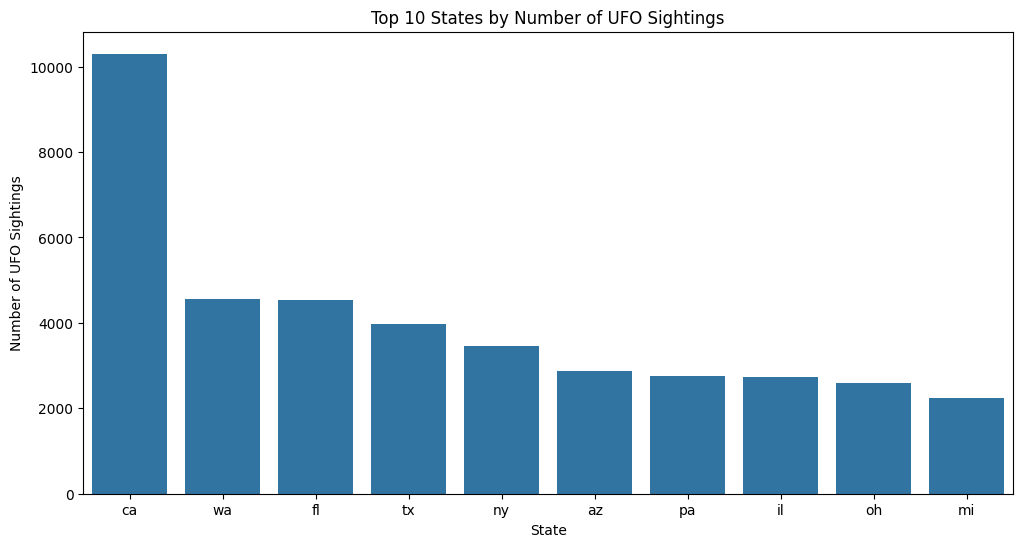

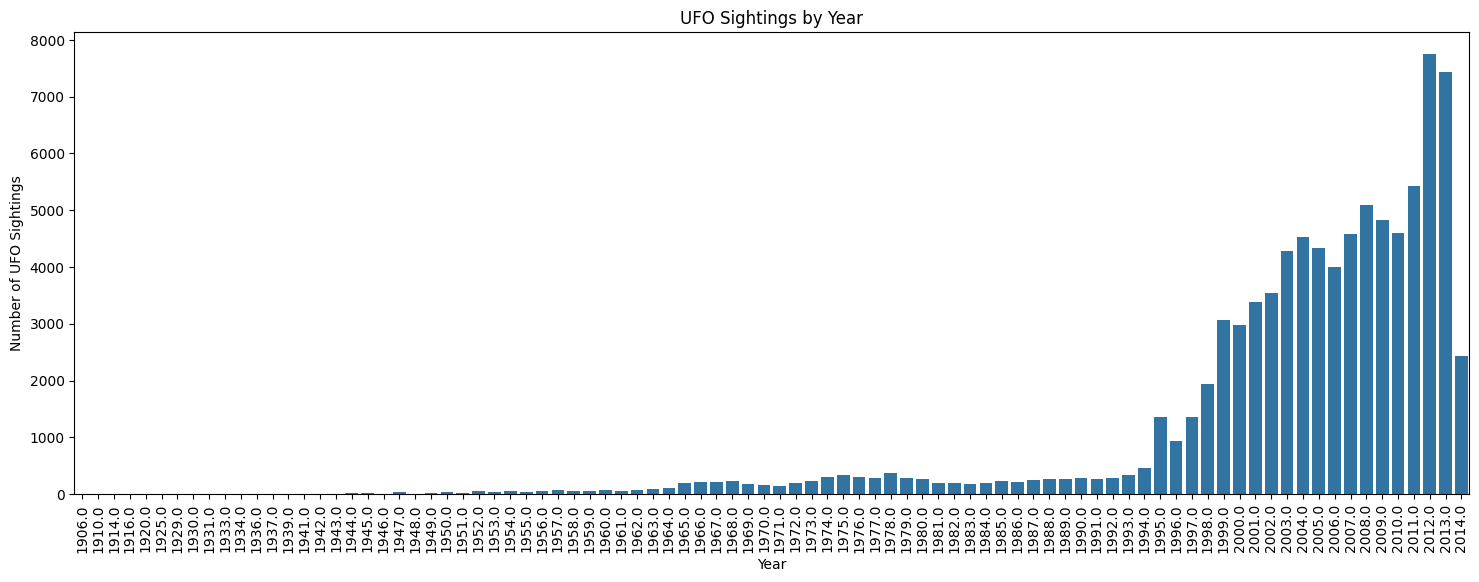

In [24]:
import numpy as np

ufo_fe = ufo.copy()

# Extracting year | mon | hour from datetime
ufo_fe['year'] = ufo_fe['datetime'].dt.year
ufo_fe['month'] = ufo_fe['datetime'].dt.month
ufo_fe['hour'] = ufo_fe['datetime'].dt.hour

# Calculating duration_log10
ufo_fe['duration_log10'] = np.log10(ufo_fe['duration (seconds)'] + 1)

# 0 - 1 min | 1 - 2min | 2 - 3 min | 3 - 4 min | 4 - 5 min | 5 - 15 min | 15 - 60 min | 1hr+ |
x_time_bins = [0, 60, 120, 180, 240, 300, 900, 3600, float('inf')]
x_cor_labels = ['0-1 min', '1-2 min', '2-3 min', '3-4 min', '4-5 min', '5-15 min', '15-60 min', '1hr+']

# Categorize bins
ufo_fe['duration_bucket'] = pd.cut(ufo_fe['duration (seconds)'], bins=x_time_bins, labels=x_cor_labels)

# US Only
ufo_fe['us_only'] = (ufo_fe['country'] == 'us').astype(int)

# Top 10 Shapes
print("======================== TOP 10 SHAPES ========================")
print(ufo_fe['shape'].value_counts().head(10))

# I want to see the bottom 10 states states
print("======================== BOTTOM 10 STATES ========================")
print(ufo_fe['state'].value_counts().tail(10))

# Year Table
print("======================== YEAR TABLE ========================")
print(ufo_fe.groupby('year').size().reset_index(name='counts'))

# State x Shape
print("======================== STATE x SHAPE ========================")
print(ufo_fe.groupby(['state', 'shape']).size().reset_index(name='counts').sort_values(by='counts', ascending=False).head(10))

# Visual
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 States
top_10_states = ufo_fe.groupby('state').size().reset_index(name='counts').sort_values(by='counts', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='state', y='counts', data=top_10_states)
plt.title('Top 10 States by Number of UFO Sightings')
plt.xlabel('State')
plt.ylabel('Number of UFO Sightings')
plt.show()

print()
print()

# Years (Curious to see when the spike is)
years = ufo_fe.groupby('year').size().reset_index(name='counts').sort_values(by='year', ascending=True)
plt.figure(figsize=(18, 6))
sns.barplot(x='year', y='counts', data=years)
plt.title('UFO Sightings by Year')
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('Number of UFO Sightings')
plt.show()


## 5.

In 3–6 sentences, based on your previous answers, summarize data quality and distributional patterns; use at least 3 facts about the dataset produced by your analysis in the previous questions.

The dataset contains 88,679 UFO sightings spanning from 1906 to 2014, with a notable surge in reports beginning around 1995. Among the top 10 states by sighting frequency, California dominates with over 10,000 reports—approximately double that of Washington, which ranks second with roughly 5,000 sightings. Florida rounds out the top three with a similar count to Washington. Notably, the Virgin Islands recorded only a single sighting over the entire century-long period, making it the least active location for UFO reports in the dataset.

# 6.
* In a new chat, prompt an AI tool to perform an EDA on the dataset for you, e.g., *Here is my dataset (attached). Give python code for a basic EDA.* Paste and run the code here (re-prompt until it gives reasonable output if there are bugs/failures).
* Write at least 2 tests for your code (focus on the most complicated parts), then answer: What did you test for? How do you know the code is correct?
* So, what did ChatGPT do for the EDA?
* Come up with 3 things it could've done instead.

UFO SIGHTINGS - EXPLORATORY DATA ANALYSIS

1. DATASET OVERVIEW

Dataset shape: 88679 rows x 11 columns

Column names and types:
datetime                 object
city                     object
state                    object
country                  object
shape                    object
duration (seconds)      float64
duration (hours/min)     object
comments                 object
date posted              object
latitude                float64
longitude               float64
dtype: object

Memory usage: 46.34 MB

2. SAMPLE DATA

First 5 rows:
           datetime                  city state country     shape  \
0  10/10/1949 20:30            san marcos    tx      us  cylinder   
1  10/10/1949 21:00          lackland afb    tx     NaN     light   
2  10/10/1955 17:00  chester (uk/england)   NaN      gb    circle   
3  10/10/1956 21:00                  edna    tx      us    circle   
4  10/10/1960 20:00               kaneohe    hi      us     light   

   duration (seconds) duration (hour

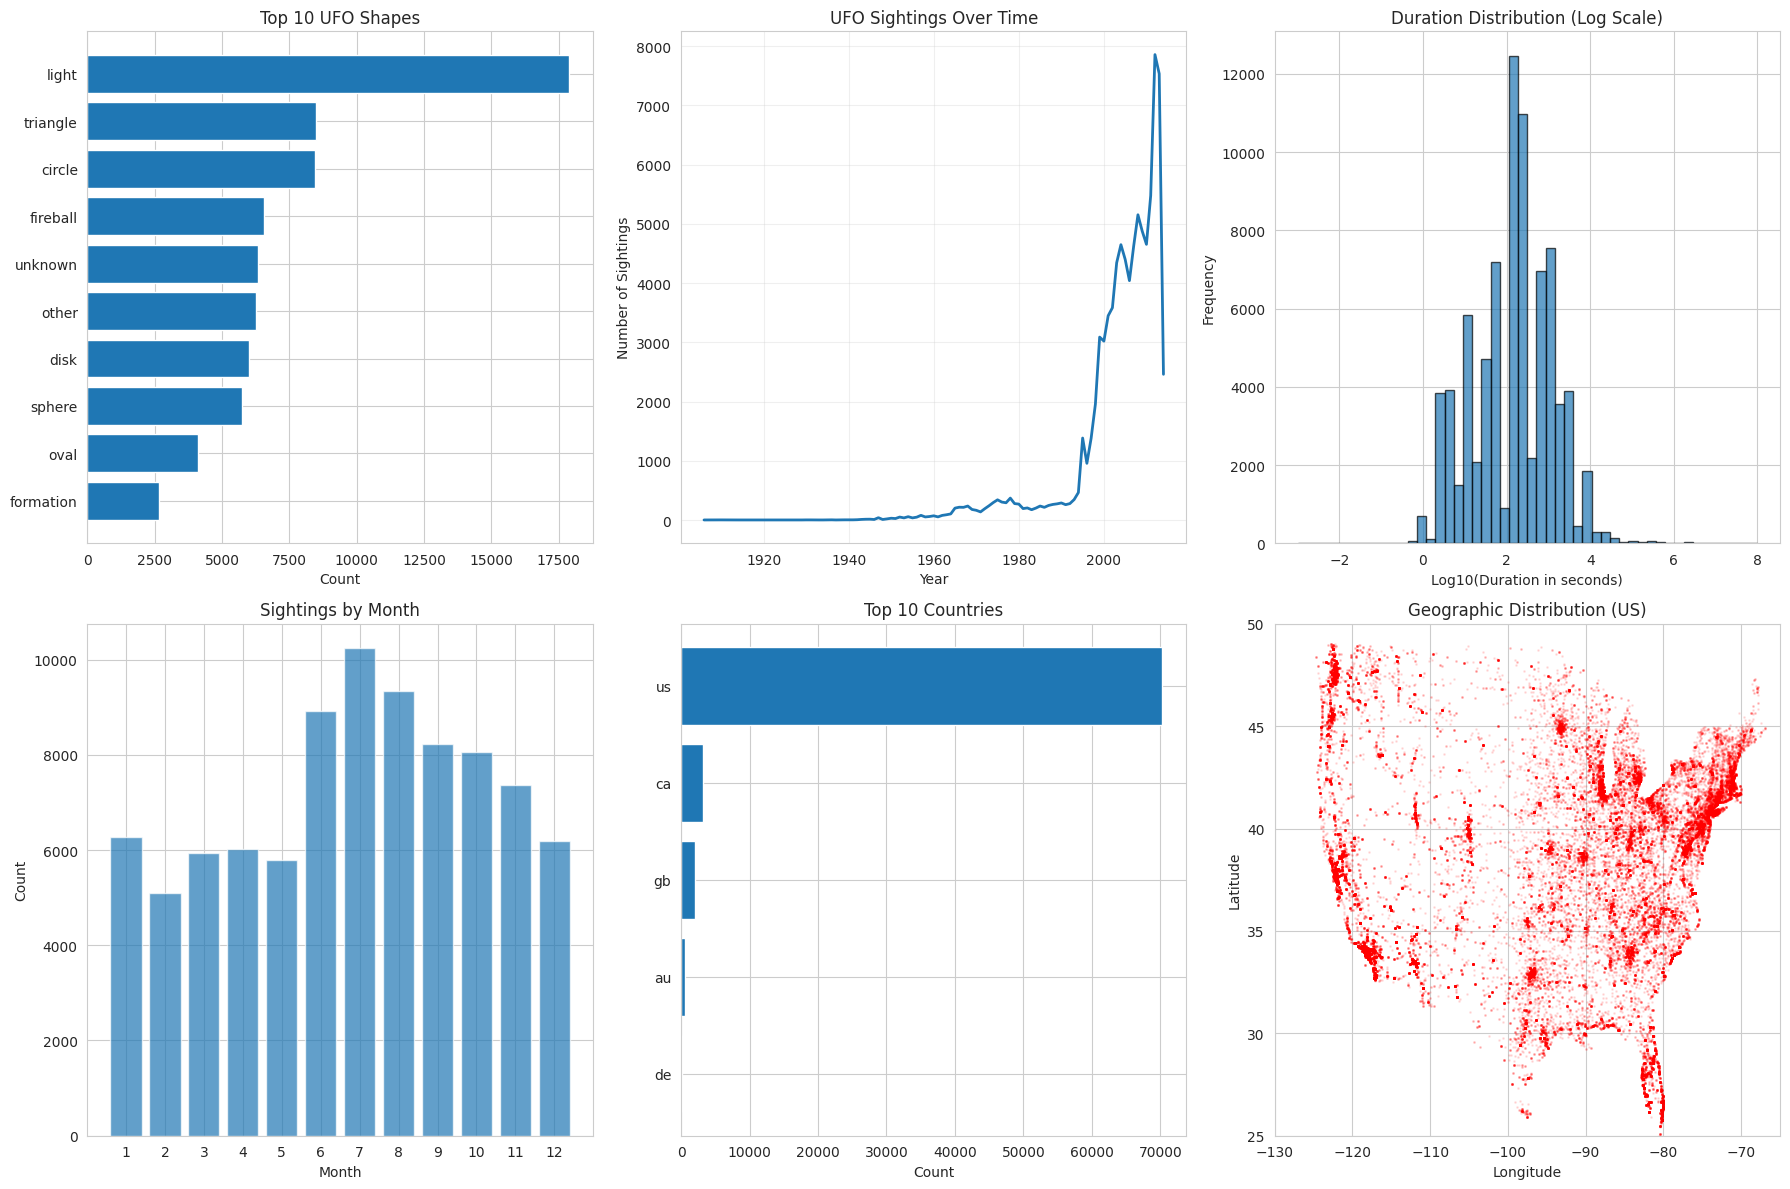

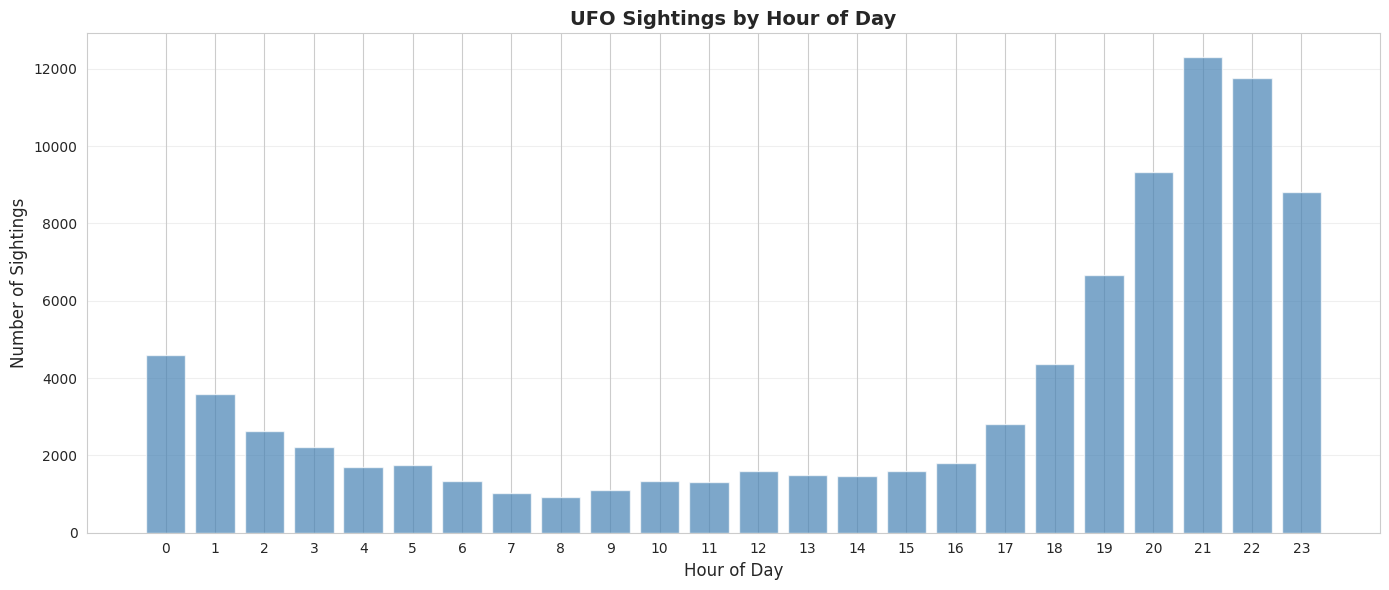

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load data - handle malformed lines
df = pd.read_csv('ufos.csv',
                 on_bad_lines='skip',
                 encoding='utf-8',
                 low_memory=False)

# Convert numeric columns
df['duration (seconds)'] = pd.to_numeric(df['duration (seconds)'], errors='coerce')
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

print("="*80)
print("UFO SIGHTINGS - EXPLORATORY DATA ANALYSIS")
print("="*80)

# 1. BASIC DATASET INFO
print("\n" + "="*80)
print("1. DATASET OVERVIEW")
print("="*80)
print(f"\nDataset shape: {df.shape[0]} rows x {df.shape[1]} columns")
print(f"\nColumn names and types:")
print(df.dtypes)
print(f"\nMemory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# 2. FIRST AND LAST ROWS
print("\n" + "="*80)
print("2. SAMPLE DATA")
print("="*80)
print("\nFirst 5 rows:")
print(df.head())
print("\nLast 5 rows:")
print(df.tail())

# 3. MISSING VALUES
print("\n" + "="*80)
print("3. MISSING VALUES ANALYSIS")
print("="*80)
missing = df.isnull().sum()
missing_pct = 100 * df.isnull().sum() / len(df)
missing_table = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
})
print(missing_table[missing_table['Missing Count'] > 0].sort_values('Percentage', ascending=False))

# 4. SUMMARY STATISTICS
print("\n" + "="*80)
print("4. NUMERICAL SUMMARY STATISTICS")
print("="*80)
print(df.describe())

# 5. CATEGORICAL COLUMNS ANALYSIS
print("\n" + "="*80)
print("5. CATEGORICAL VARIABLES")
print("="*80)

# Top countries
print("\nTop 10 Countries:")
print(df['country'].value_counts().head(10))

# Top states
print("\nTop 10 States:")
print(df['state'].value_counts().head(10))

# Top shapes
print("\nTop 10 UFO Shapes:")
print(df['shape'].value_counts().head(10))

# Top cities
print("\nTop 10 Cities:")
print(df['city'].value_counts().head(10))

# 6. DURATION ANALYSIS
print("\n" + "="*80)
print("6. DURATION ANALYSIS")
print("="*80)
print("\nDuration (seconds) statistics:")
print(df['duration (seconds)'].describe())
print(f"\nMedian duration: {df['duration (seconds)'].median():.2f} seconds")
print(f"Durations > 1 hour (3600s): {(df['duration (seconds)'] > 3600).sum()}")
print(f"Durations > 1 day (86400s): {(df['duration (seconds)'] > 86400).sum()}")

# 7. DATETIME ANALYSIS
print("\n" + "="*80)
print("7. TEMPORAL ANALYSIS")
print("="*80)

# Parse datetime
df['datetime_parsed'] = pd.to_datetime(df['datetime'], errors='coerce')
df['year'] = df['datetime_parsed'].dt.year
df['month'] = df['datetime_parsed'].dt.month
df['hour'] = df['datetime_parsed'].dt.hour

print(f"\nDate range: {df['datetime_parsed'].min()} to {df['datetime_parsed'].max()}")
print(f"\nSightings by year (top 10):")
print(df['year'].value_counts().sort_index(ascending=False).head(10))

print(f"\nSightings by month:")
month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
               7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
monthly = df['month'].value_counts().sort_index()
for month, count in monthly.items():
    print(f"{month_names.get(month, month)}: {count}")

# 8. GEOGRAPHIC ANALYSIS
print("\n" + "="*80)
print("8. GEOGRAPHIC DISTRIBUTION")
print("="*80)
print(f"\nLatitude range: {df['latitude'].min():.2f} to {df['latitude'].max():.2f}")
print(f"Longitude range: {df['longitude'].min():.2f} to {df['longitude'].max():.2f}")
print(f"\nMissing coordinates: {df[['latitude', 'longitude']].isnull().any(axis=1).sum()}")

# 9. TEXT ANALYSIS
print("\n" + "="*80)
print("9. COMMENTS ANALYSIS")
print("="*80)
df['comment_length'] = df['comments'].fillna('').str.len()
print(f"\nComment length statistics:")
print(df['comment_length'].describe())
print(f"\nEmpty comments: {(df['comment_length'] == 0).sum()}")

# 10. VISUALIZATIONS
print("\n" + "="*80)
print("10. GENERATING VISUALIZATIONS")
print("="*80)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot 1: Top shapes
top_shapes = df['shape'].value_counts().head(10)
axes[0, 0].barh(range(len(top_shapes)), top_shapes.values)
axes[0, 0].set_yticks(range(len(top_shapes)))
axes[0, 0].set_yticklabels(top_shapes.index)
axes[0, 0].set_xlabel('Count')
axes[0, 0].set_title('Top 10 UFO Shapes')
axes[0, 0].invert_yaxis()

# Plot 2: Sightings over time
yearly = df.groupby('year').size()
axes[0, 1].plot(yearly.index, yearly.values, linewidth=2)
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Number of Sightings')
axes[0, 1].set_title('UFO Sightings Over Time')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Duration distribution (log scale)
duration_filtered = df[df['duration (seconds)'] > 0]['duration (seconds)']
axes[0, 2].hist(np.log10(duration_filtered), bins=50, edgecolor='black', alpha=0.7)
axes[0, 2].set_xlabel('Log10(Duration in seconds)')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].set_title('Duration Distribution (Log Scale)')

# Plot 4: Sightings by month
monthly_counts = df['month'].value_counts().sort_index()
axes[1, 0].bar(monthly_counts.index, monthly_counts.values, alpha=0.7)
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Sightings by Month')
axes[1, 0].set_xticks(range(1, 13))

# Plot 5: Top countries
top_countries = df['country'].value_counts().head(10)
axes[1, 1].barh(range(len(top_countries)), top_countries.values)
axes[1, 1].set_yticks(range(len(top_countries)))
axes[1, 1].set_yticklabels(top_countries.index)
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_title('Top 10 Countries')
axes[1, 1].invert_yaxis()

# Plot 6: Geographic scatter (US sightings)
us_data = df[df['country'] == 'us'].dropna(subset=['latitude', 'longitude'])
axes[1, 2].scatter(us_data['longitude'], us_data['latitude'],
                   alpha=0.1, s=1, c='red')
axes[1, 2].set_xlabel('Longitude')
axes[1, 2].set_ylabel('Latitude')
axes[1, 2].set_title('Geographic Distribution (US)')
axes[1, 2].set_xlim(-130, -65)
axes[1, 2].set_ylim(25, 50)

plt.tight_layout()
plt.savefig('ufo_eda_plots.png', dpi=300, bbox_inches='tight')
print("\nVisualizations saved to: ufo_eda_plots.png")

# Additional time-based plot
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
hourly = df['hour'].value_counts().sort_index()
ax.bar(hourly.index, hourly.values, alpha=0.7, color='steelblue')
ax.set_xlabel('Hour of Day', fontsize=12)
ax.set_ylabel('Number of Sightings', fontsize=12)
ax.set_title('UFO Sightings by Hour of Day', fontsize=14, fontweight='bold')
ax.set_xticks(range(24))
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('ufo_hourly_distribution.png', dpi=300, bbox_inches='tight')
print("Hourly distribution saved to: ufo_hourly_distribution.png")

print("\n" + "="*80)
print("EDA COMPLETE")
print("="*80)

# 7.
* Now, give screenshots of your code output back to the AI tool, and ask it to interpret the results for you, e.g., *Here are the results, interpret.* Paste the interpretation it provides here.
* What do you agree with?
* What do you disagree with?


## 8.

* Propose and implement 1-2 concrete next steps for your EDA (e.g., better deduplication with fuzzy text, geospatial clustering, normalization of duration text, timezone handling, creation of dummy variables, visualization of a different column, etc.) to improve your understanding of the data, pretending that you are going to use this dataset for important downstream tasks later.
* Interpret your results: what did you learn about the dataset?

# C [30pts]. Interview Questions

We now pretend this is a real job interview. Here's some guidance on how to answer these questions:

1. Briefly restate the question and state any assumptions you are making.

2. Explain your reasoning out loud, focusing on tradeoffs, limitations, and constraints.

3. As a principle, keep your answers as short and clear as they can be (while still answering the question).

4. Write/speak in a conversational but professional tone (avoid being overly formal). For speaking: speak at a reasonable pace and volume, speak clearly, pause when you need to, and practice making "eye contact" with the camera. Keep a confident, positive, and professional tone. *For additional coaching and practice, the University Writing Center provides individual appointments: https://writingcenter.tamu.edu/make-an-appointment.*

There may not be a single correct answer. We are grading whether your reasoning is reasonable and aware of limitations.

These questions are written unless a video response is specified.


**Rubric**

[6pt] Clear understanding of the question; reasonable assumptions; thoughtful reasoning that acknowledges tradeoffs and limitations; clear, concise communication in a conversational but professional tone (for speaking: clear pace, volume, and articulation).

[3pt] Basic understanding but shallow reasoning or unclear assumptions; communication is somewhat unclear, overly verbose, or overly informal/formal.

[0pt] Minimal, unclear, or incorrect response; poor communication or unprofessional tone.

## 1.
When should you use `pandas` versus just read in a csv?

## 2.
If this dataset suddenly grew by 10000×, which parts of your analysis pipeline would fail first? (Hint: Consider your hardware constraints.)

## 3.
Assume some fraction of reports are adversarially fabricated (meaning: someone submitted fake UFO reports on purpose). How does that change your analysis?

## 4.
How would incorrect timezone handling distort downstream statistical conclusions?

## 5.
Now, link to a video (1 min. max) of yourself answering the following question: What kind of selection bias do you think is present in this web-based UFO dataset?

Make sure to end on a follow-up question for the interviewer -- e.g., *So, to get some more context, are you thinking about this for a Speech AI application like Siri?*

# D [2pts]. What new questions do you have?
We want you to think bigger! Tell us what questions and curiosity this homework brings up for you.

**Rubric**

[2pt] Complete, thoughtful response.

[1pt] Partial response.

[0pt] Minimal response.

# 1.
What new questions do you have about data cleaning and exploratory data analysis (in general) after this homework? Or, what topics are you curious about now? List at least 3.